# Lezione 1.1 - Test del Generatore Pseudo-Casuale

## Obiettivo
Testare il generatore di numeri pseudo-casuali stimando:
1. $\langle r \rangle = \int_0^1 r dr = 1/2$
2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$
3. Test $\chi^2$ per verificare l'uniformità della distribuzione

### **Metodo del Data Blocking**
Per stimare l'incertezza statistica dividiamo $M$ estrazioni in $N$ blocchi di $L=M/N$ estrazioni ciascuno.
In ogni blocco $i$ calcoliamo $A_i$, poi:
$$\langle A \rangle \simeq \frac{1}{N} \sum_{i=1}^N A_i \quad \quad \sigma_A \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A_i^2 - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]}$$

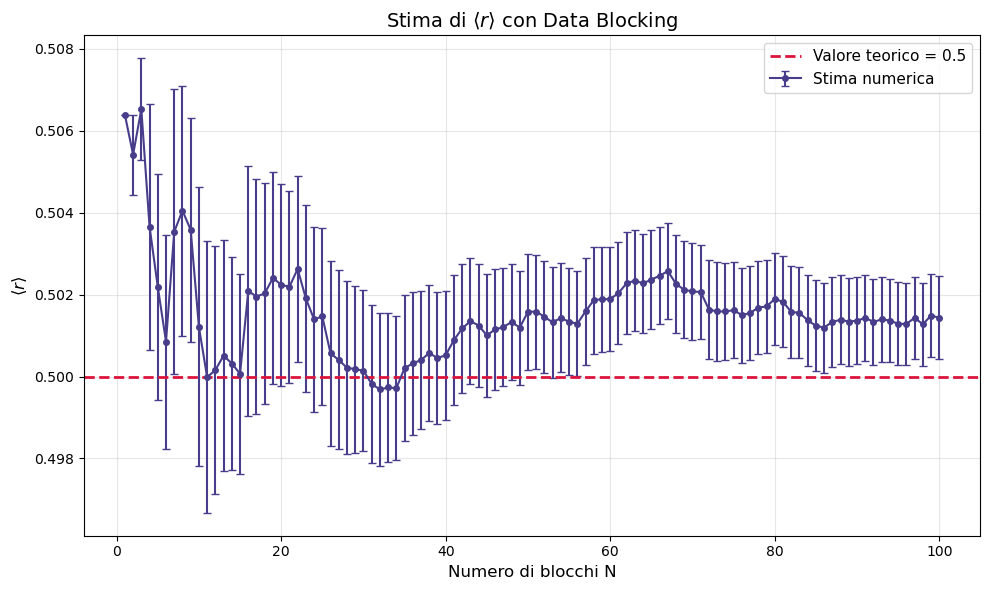

Valore finale: <r> = 0.501438 ± 0.001012
Valore teorico: <r> = 0.5
Differenza: 0.001438 (1.4σ)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

### **Parte 1: Stima di $\langle r \rangle = 1/2$**

# Carico i dati per <r>
data1 = np.loadtxt("output1_1.dat")

blocks1 = data1[:,0]     # Numero di blocchi
mean1 = data1[:,1]       # Media progressiva
error1 = data1[:,2]      # Errore statistico

# Valore teorico atteso
theory_mean = 0.5

# Plot per <r>
plt.figure(figsize=(10,6))
plt.errorbar(blocks1, mean1, yerr=error1, fmt='o-', capsize=3, markersize=4,
             label="Stima numerica", color='darkslateblue')
plt.axhline(theory_mean, color='crimson', linestyle='--', linewidth=2,
            label=f"Valore teorico = {theory_mean}")
plt.xlabel("Numero di blocchi N", fontsize=12)
plt.ylabel("$\\langle r \\rangle$", fontsize=12)
plt.title("Stima di $\\langle r \\rangle$ con Data Blocking", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Valore finale: <r> = {mean1[-1]:.6f} ± {error1[-1]:.6f}")
print(f"Valore teorico: <r> = {theory_mean}")
print(f"Differenza: {abs(mean1[-1] - theory_mean):.6f} ({abs(mean1[-1] - theory_mean)/error1[-1]:.1f}σ)")

### **Interpretazione dei Risultati**

Il grafico mostra la convergenza della stima di $\langle r \rangle$ verso il valore teorico $1/2$. Si osserva che:

- La media progressiva si stabilizza intorno al valore atteso
- Le barre d'errore diminuiscono come $1/\sqrt{N}$ all'aumentare dei blocchi  
